# Cats Vs. Dogs
### Eden Trainor


#### Imports


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as skl

#making things pretty
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 #Image resizing
import os
from tqdm import tqdm

from sklearn.utils import shuffle as mutual_shuffle
from sklearn.model_selection import train_test_split



C:\Users\EdenTrainor\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%pprint

Pretty printing has been turned OFF


#### Load Data

Global Variable setting:


In [3]:
USER_NAME = 'EdenTrainor' #Configure this with your username
DATA_REPO = 'C:/Users/{}/Datalytyx/Delivery - Documents/Data Science/Data/'.format(USER_NAME)

#Path of actual image JPGs
TRAIN_IMAGES_FOLDER = '{}Cat_VS_Dog/all/train_images/'.format(DATA_REPO)
TEST_IMAGES_FOLDER = '{}Cat_VS_Dog/all/test_images/'.format(DATA_REPO)

#Path of images as resized arrays
TRAIN_ARRAYS_FOLDER = '{}Cat_VS_Dog/all/train_arrays/'.format(DATA_REPO)
TEST_ARRAYS_FOLDER = '{}Cat_VS_Dog/all/test_arrays/'.format(DATA_REPO)


#Images will be resized to a square of size:
IMAGE_SIZE = 64
EVAL_SPLIT_SIZE = 5000




Create function to parse images into list of arrays and extract labels from image names

In [4]:
#Function to parse labels from image files

def label_parser(img_path):
    #get label from image name: e.g. dog.93.jpg
    word_label = img_path.split('.')[0]
    
    
    #One Hot the labels
    if word_label == 'dog': 
        return [1, 0]
    
    elif word_label == 'cat': 
        return [0, 1]
    
    # Deal with exceptions but don't stop process.
    else: 
        print('Unable to parse label for {}'.format(img_path))

        
        
def create_train_data():
    train_images = []
    train_labels = []
    
    for img in tqdm(os.listdir(TRAIN_IMAGES_FOLDER)):
        
        #Label the image
        label = label_parser(img)
        
        
        path = os.path.join(TRAIN_IMAGES_FOLDER, img)
        
        img = cv2.imread(path)
        
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
        
        train_images.append(img)
        train_labels.append(label)
    
    #Stack images
    train_images = np.stack(train_images, axis = 0)
    train_labels = np.stack(train_labels, axis = 0)    
   
    np.save('{}train_images-{}.npy'.format(TRAIN_ARRAYS_FOLDER, IMAGE_SIZE), train_images)
    np.save('{}train_labels-{}.npy'.format(TRAIN_ARRAYS_FOLDER, IMAGE_SIZE), train_labels)
    
    return train_images, train_labels
        
    

In [5]:
train_images, train_labels = create_train_data()

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:57<00:00, 434.68it/s]


Do the same for test data. But just export to array.

In [6]:
def process_test_data():
    test_data = []
    
    for img in tqdm(os.listdir(TEST_IMAGES_FOLDER)):
        
        path = os.path.join(TEST_IMAGES_FOLDER, img)
        
        img_num = img.split('.')[0]
        
        img = cv2.imread(path)
        
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
        
        test_data.append([img, img_num])
    
    test_data = np.stack(test_data, axis = 0)
        
    np.save('{}test_images-{}.npy'.format(TEST_ARRAYS_FOLDER, IMAGE_SIZE), test_data)

In [7]:
process_test_data()

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:31<00:00, 401.73it/s]


Split data into train/eval features/labels and shuffle the data.

In [8]:
train_X, eval_X, train_y, eval_y = train_test_split(train_images, train_labels,
                                                    random_state = 0,
                                                    test_size = 0.2)

### Experimental Data Analysis

Look at the distribution of target classes in dataset

In [20]:
print('Number of dogs in training set {}, number of cats in training set {}'.format(train_y[:,0].sum(), train_y[:,1].sum()))

Number of dogs in training set 9996, number of cats in training set 10004


In [21]:
print('Number of dogs in evaluation set {}, number of cats in evaluation set {}'.format(eval_y[:,0].sum(), eval_y[:,1].sum()))

Number of dogs in evaluation set 2504, number of cats in evaluation set 2496


#### Edge Detection Filters

In [22]:
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage import feature

Look at image through 4 edge detection filters, filters work on grayscale images.

In [46]:
test_img = train_X[0]
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)

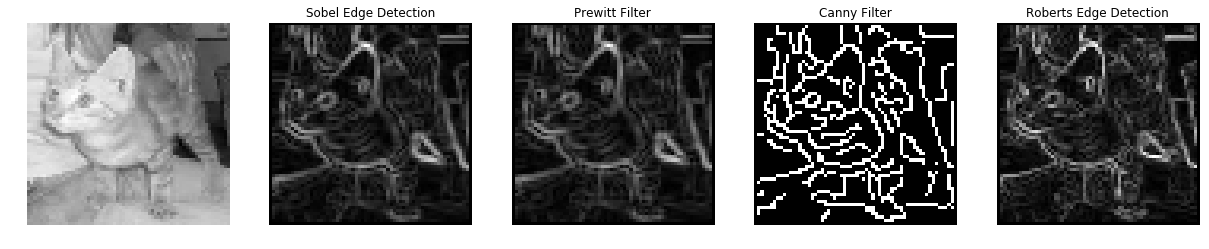

In [47]:
edge_canny = feature.canny(test_image)
edge_roberts = roberts(test_img)
edge_sobel = sobel(test_img)
edge_prewitt = prewitt(test_img)

fig, ax = plt.subplots(ncols=5, sharex=True, sharey=True, figsize=(21, 10.5))

ax[0].imshow(test_img, cmap=plt.cm.gray)
ax[0].set_title('Test Image', color = 'w')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

ax[2].imshow(edge_prewitt, cmap=plt.cm.gray)
ax[2].set_title('Prewitt Filter')

ax[3].imshow(edge_canny, cmap=plt.cm.gray)
ax[3].set_title('Canny Filter')

ax[4].imshow(edge_roberts, cmap=plt.cm.gray)
ax[4].set_title('Roberts Edge Detection')

for a in ax:
    a.axis('off')